In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
N_PART_PER_JET = 10
N_FEAT = 14

In [4]:
# fTrain = "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newTrainDatapt20_vDter_Signal_Only.h5"
# fTest = "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newTestDatapt20_vDter_Signal_Only.h5"
# fJetData =  "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newJetDatapt20_vDter_Signal_Only.h5"
# fSampleData = "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newSampleDatapt20_vDter_Signal_Only.h5"
# fBkgTrain = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/trainingDatapt30QCD.h5"
# fBkgTest = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/testingDatapt30QCD.h5"
# fBkgJetData = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/jetDatapt30QCD.h5"
# fBkgSampleData = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/sampleDatapt30QCD.h5"

In [23]:
fTrain = "/home/users/russelld/L1JetTagDaniel/stopData/newTrainDataST30.h5"
fTest = "/home/users/russelld/L1JetTagDaniel/stopData/newTestDataST30.h5"
fJetData =  "/home/users/russelld/L1JetTagDaniel/stopData/newJetDataST30.h5"
fSampleData = "/home/users/russelld/L1JetTagDaniel/stopData/newSampleDataST30.h5"
fBkgTrain = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/trainingDatapt30QCD.h5"
fBkgTest = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/testingDatapt30QCD.h5"
fBkgJetData = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/jetDatapt30QCD.h5"
fBkgSampleData = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/sampleDatapt30QCD.h5"

In [24]:
with h5py.File(fTrain, "r") as hf:
    trainData = hf["Training Data"][:]
with h5py.File(fSampleData, "r") as hf:
    sampleData = hf["Sample Data"][:] #Contains ("Pt", "Eta", "Phi", "M")

with h5py.File(fTest, "r") as hf:
    testData = hf["Testing Data"][:]
with h5py.File(fJetData, "r") as hf:
    jetData = hf["Jet Data"][:] #Contains ("Pt", "Eta", "Phi", "M")

with h5py.File(fBkgTrain, "r") as hf:
    bkgTrainData = hf["Training Data"][:]
with h5py.File(fBkgSampleData, "r") as hf:
    bkgSampleData = hf["Sample Data"][:] #Contains ("Pt", "Eta", "Phi", "M")

with h5py.File(fBkgTest, "r") as hf:
    bkgTestData = hf["Testing Data"][:]
with h5py.File(fBkgJetData, "r") as hf:
    bkgJetData = hf["Jet Data"][:] #Contains ("Pt", "Eta", "Phi", "M")


Stacked training and testing data on top of each other

In [25]:
fullSignalFeatureData = np.vstack((trainData, testData))
fullSignalJetData = np.vstack((sampleData, jetData)) #Pt, Eta, Phi, Mass
#assert lengths below
assert fullSignalFeatureData.shape[0] == fullSignalJetData.shape[0]

In [26]:
fullBkgFeatureData = np.vstack((bkgTrainData, bkgTestData))
fullBkgJetData = np.vstack((bkgSampleData, bkgJetData)) #Pt, Eta, Phi, Mass
#asser the lengths below
assert fullBkgFeatureData.shape[0] == fullBkgJetData.shape[0]

In [27]:
onlyLabels = False
Labels_EventNum = False
Labels_EventNum_LLPinfo = False
if fullSignalFeatureData.shape[1] == 141:
    print ("\nRanges of elements are as follows: \n")
    print("Features[0:140], labels[140].")
    onlyLabels = True
elif fullSignalFeatureData.shape[1] == 142:
    print ("\nRanges of elements are as follows: \n")
    print("Features[0:140], labels[140], EventNumber[141].")
    Labels_EventNum = True
else:
    print ("\nRanges of elements are as follows: \n")
    print("Features[0:140], labels[140], EventNumber[141], LLPinfo[142:fullSignalFeatureData.shape[1]]")
    Labels_EventNum_LLPinfo = True


Ranges of elements are as follows: 

Features[0:140], labels[140].


In [37]:
bkgA = fullBkgFeatureData[:,0:140] #Jet Features
bkgb = fullBkgFeatureData[:, 140] #Labels
bkgA = bkgA.reshape((bkgA.shape[0], N_PART_PER_JET, N_FEAT))
bkg_dz = bkgA[:, :,  8].ravel()
bkg_dx = bkgA[:, :,  9].ravel()
bkg_dy = bkgA[:, :, 10].ravel()
bkg_pt = bkgA[:, :, 11].ravel()
bkg_eta = bkgA[:, :, 12].ravel()
bkg_phi = bkgA[:, :, 13].ravel()
bkgDF = pd.DataFrame({"dz": bkg_dz, "dx": bkg_dx, "dy": bkg_dy, \
    "$p_T$": bkg_pt, "$\eta$" : bkg_eta, "$\phi$": bkg_phi  })
bkgJetsDF = pd.DataFrame({ "$p_T$": fullBkgJetData[:,0], "$\eta$": fullBkgJetData[:,1], \
    "$\phi$": fullBkgJetData[:,2], "mass": fullBkgJetData[:,3]  })


In [29]:
import mplhep as hep
plt.style.use(hep.style.ROOT)

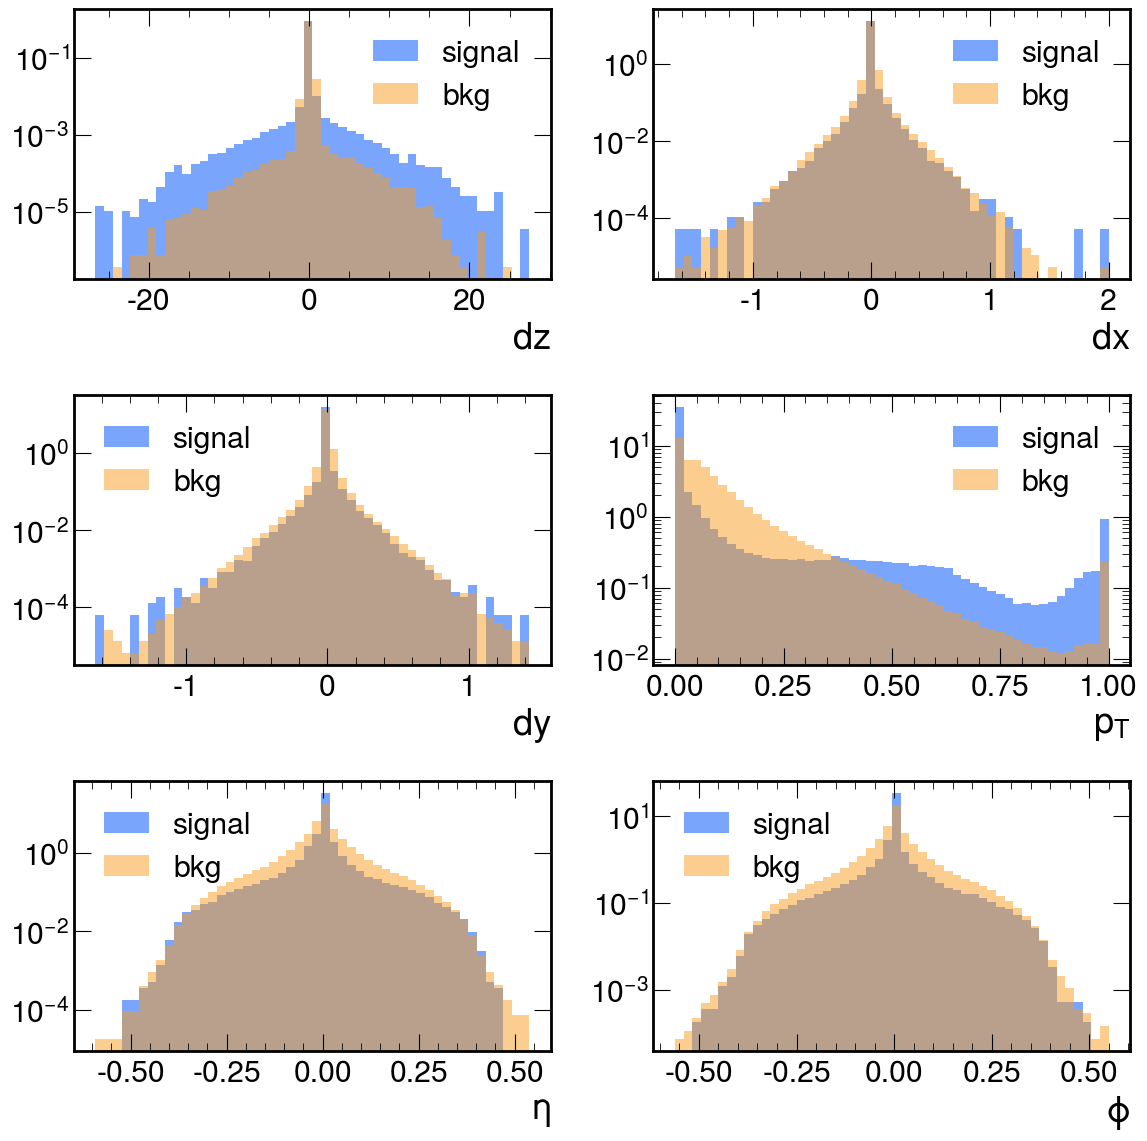

In [46]:
if onlyLabels == True:
    sigA = fullSignalFeatureData[:,0:140] #Jet Features
    sigb = fullSignalFeatureData[:, 140] #Labels
    sigA = sigA.reshape((sigA.shape[0], N_PART_PER_JET, N_FEAT))
    sig_dz = sigA[:, :, 8].ravel()
    sig_dx = sigA[:, :, 9].ravel()
    sig_dy = sigA[:, :,  10].ravel()
    sig_pt = sigA[:, :,  11].ravel()
    sig_eta = sigA[:, :, 12].ravel()
    sig_phi = sigA[:, :, 13].ravel()
    sigDF = pd.DataFrame({"dz": sig_dz, "dx": sig_dx, "dy": sig_dy, \
    "$p_T$": sig_pt, "$\eta$" : sig_eta, "$\phi$": sig_phi  })
    sigJetsDF = pd.DataFrame({ "$p_T$": fullSignalJetData[:,0], "$\eta$": fullSignalJetData[:,1], \
    "$\phi$": fullSignalJetData[:,2], "mass": fullSignalJetData[:,3]  })
    #plotting
    fig, axs = plt.subplots(3, 2, figsize=(12,12))
    #hep.cms.text("Phase 2 Simulation")
    #hep.cms.lumitext("PU 200 (14 TeV)")
    for idx, ax in enumerate(axs.reshape(-1)):
        bkgCol = bkgDF.columns[idx]
        sigCol = sigDF.columns[idx]
        bkgData = bkgDF[bkgCol]
        sigData = sigDF[sigCol] 
        xmin = min(np.min(bkgData), np.min(sigData))
        xmax = max(np.max(bkgData), np.max(sigData))

        ax.hist(sigData, bins=np.linspace(xmin, xmax, 51), alpha=0.8, label="signal", density=True)
        ax.hist(bkgData, bins=np.linspace(xmin, xmax, 51), alpha=0.5, label="bkg", density=True)
        ax.set_xlabel(sigCol)
        ax.tick_params(axis="both", which="major")
        ax.set_yscale("log")
        ax.legend()

    plt.tight_layout()
    plt.show()
    
    
    plt.savefig("particle_kinematics.png")
    

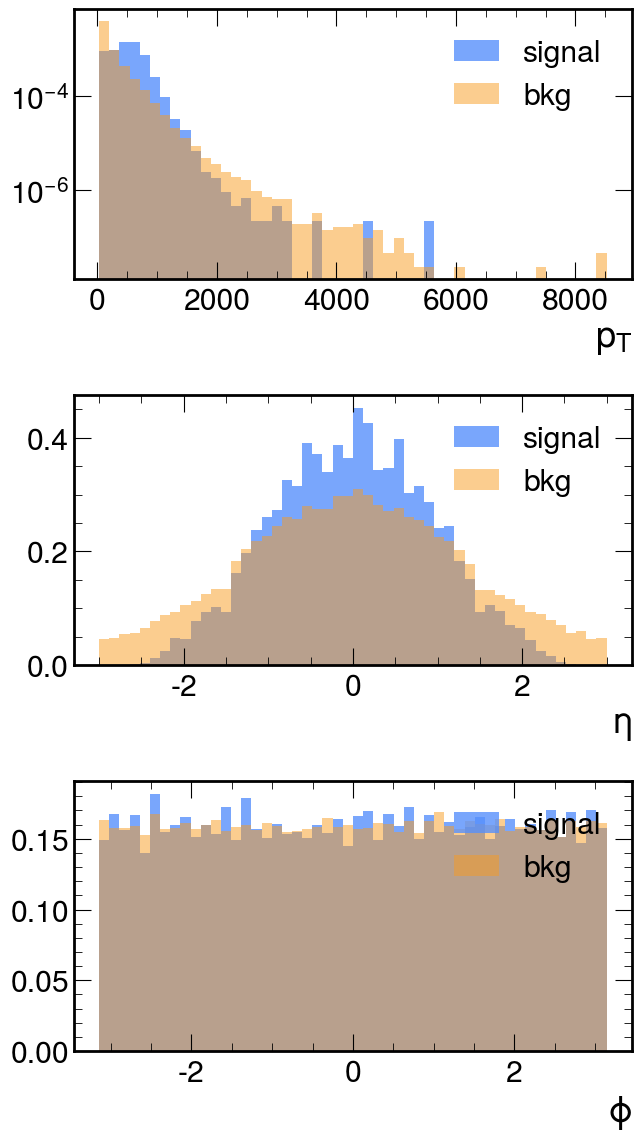

In [52]:
if onlyLabels == True:    
    fig2, axs2 = plt.subplots(3, 1, figsize=(7,12))
    for idx, ax2 in enumerate(axs2.reshape(-1)):
        bkgCol = bkgJetsDF.columns[idx]
        sigCol = sigJetsDF.columns[idx]
        bkgData = bkgJetsDF[bkgCol]
        sigData = sigJetsDF[sigCol] 
        xmin = min(np.min(bkgData), np.min(sigData))
        xmax = max(np.max(bkgData), np.max(sigData))

        ax2.hist(sigData, bins=np.linspace(xmin, xmax, 51), alpha=0.8, label="signal", density=True)
        ax2.hist(bkgData, bins=np.linspace(xmin, xmax, 51), alpha=0.5, label="bkg", density=True)
        ax2.set_xlabel(sigCol)
        ax2.tick_params(axis="both", which="major")
        ax2.legend()
        if sigCol == '$p_T$':
            ax2.set_yscale("log")
        else: continue
    plt.tight_layout()
    plt.savefig("jetKinematics.png")
    plt.show()


In [17]:
try:
    if onlyLabels == True:
        print("ok")
except: NameError